# Multiple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import kagglehub

e:\project\practice\myvenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Define database

In [2]:
path = kagglehub.dataset_download("debajyotipodder/co2-emission-by-vehicles")
df = pd.read_csv(path + r"/CO2 Emissions_Canada.csv")

df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [4]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


### Preprocessing

In [6]:
cdf = df[["Engine Size(L)", "Cylinders", "Fuel Consumption Comb (L/100 km)", "CO2 Emissions(g/km)"]]
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Engine Size(L)                    7385 non-null   float64
 1   Cylinders                         7385 non-null   int64  
 2   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 3   CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 230.9 KB


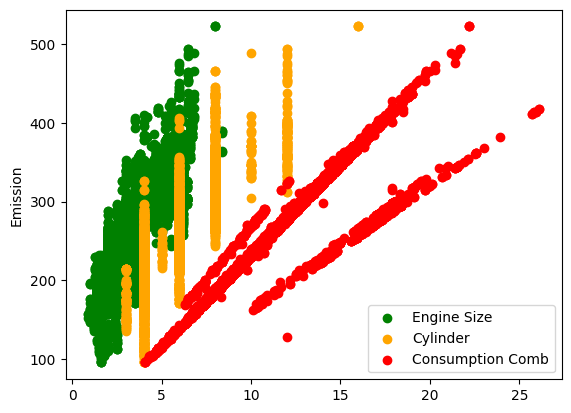

In [27]:
plt.scatter(cdf["Engine Size(L)"], cdf["CO2 Emissions(g/km)"], color="green", label="Engine Size")
plt.scatter(cdf["Cylinders"], cdf["CO2 Emissions(g/km)"], color="orange", label="Cylinder")
plt.scatter(cdf["Fuel Consumption Comb (L/100 km)"], cdf["CO2 Emissions(g/km)"], color="red", label="Consumption Comb")
plt.legend(loc="best")
plt.ylabel("Emission")
plt.show()

In [9]:
msk = np.random.rand(len(df)) < 0.8
train, test = cdf[msk], cdf[~msk]

train.shape, test.shape

((5912, 4), (1473, 4))

### Define model

In [11]:
mymodel = LinearRegression()

x_train = np.asanyarray(train[["Engine Size(L)", "Cylinders", "Fuel Consumption Comb (L/100 km)"]])
y_train = np.asanyarray(train[["CO2 Emissions(g/km)"]])

mymodel.fit(x_train, y_train)

print(f"coefficient : {mymodel.coef_[0][0]:.5f}, {mymodel.coef_[0][1]:.5f}, {mymodel.coef_[0][2]:.5f} | intercept : {mymodel.intercept_[0]:.5f}")

coefficient : 5.42095, 6.46126, 13.27296 | intercept : 51.63356


### Model evaluation

In [13]:
x_test = np.asanyarray(test[["Engine Size(L)", "Cylinders", "Fuel Consumption Comb (L/100 km)"]])
y_test = np.asanyarray(test[["CO2 Emissions(g/km)"]])

y_pred = mymodel.predict(x_test)

In [14]:
mse = np.mean((y_test - y_pred) ** 2)
mae = np.mean(np.absolute(y_test - y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error : {mse:.5f} | Mean Absolute Error : {mae:.5f} | R2 Score : {r2:.5f}")

Mean Squared Error : 404.27412 | Mean Absolute Error : 13.28512 | R2 Score : 0.88519


## Practice
##### Try to use a multiple linear regression with the same dataset, but this time use FUEL CONSUMPTION in CITY and FUEL CONSUMPTION in HWY instead of FUELCONSUMPTION_COMB. Does it result in better accuracy?

### Preprocessing

In [ ]:
mdf = df[["Engine Size(L)", "Cylinders", "Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)", "CO2 Emissions(g/km)"]]

mdf.shape

(7385, 5)

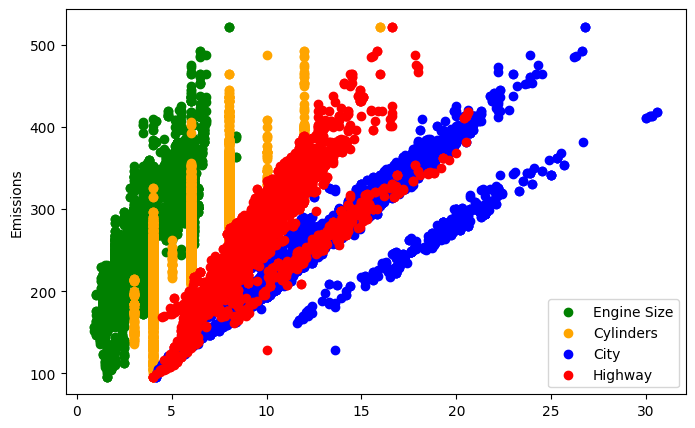

In [22]:
plt.figure(figsize=(8, 5))
plt.scatter(mdf["Engine Size(L)"], mdf["CO2 Emissions(g/km)"], color="green", label="Engine Size")
plt.scatter(mdf["Cylinders"], mdf["CO2 Emissions(g/km)"], color="orange", label="Cylinders")
plt.scatter(mdf["Fuel Consumption City (L/100 km)"], mdf["CO2 Emissions(g/km)"], color="blue", label="City")
plt.scatter(mdf["Fuel Consumption Hwy (L/100 km)"], mdf["CO2 Emissions(g/km)"], color="red", label="Highway")
plt.legend(loc="best")
plt.ylabel("Emissions")
plt.show()

In [28]:
msk = np.random.rand(len(df)) < 0.8
train, test = mdf[msk], mdf[~msk]

train.shape, test.shape

((5844, 5), (1541, 5))

### Model definition

In [32]:
mymodel = LinearRegression()

x_train = np.asanyarray(train[["Engine Size(L)", "Cylinders", "Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)"]])
y_train = np.asanyarray(train[["CO2 Emissions(g/km)"]])

mymodel.fit(x_train, y_train)

print(f"model coefficient : {mymodel.coef_[0][0]:.5f}, {mymodel.coef_[0][1]:.5f}, {mymodel.coef_[0][2]:.5f}, {mymodel.coef_[0][3]:.5f} | model intercept : {mymodel.intercept_[0]:.5f}")

model coefficient : 5.93335, 6.16379, 7.09390, 6.41463 | model intercept : 50.14859


### model evaluation

In [ ]:
x_test = np.asanyarray(test[["Engine Size(L)", "Cylinders", "Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)"]])
y_test = np.asanyarray(test[["CO2 Emissions(g/km)"]])

y_pred = mymodel.predict(x_test)

In [31]:
mse = np.mean((y_test - y_pred) ** 2)
mae = np.mean(np.absolute(y_test - y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error : {mse:.5f} | Mean Absolute Error : {mae:.5f} | R2 Score : {r2:.5f}")

Mean Squared Error : 404.27412 | Mean Absolute Error : 13.28512 | R2 Score : 0.88519
